## Importing Libraries

In [1]:
# Data Processing
import numpy as np
import pandas as pd
from collections import Counter

# Importing tde
import tde

# Visualization
import matplotlib.pyplot as plt

# Model and Performance
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.svm import OneClassSVM
from sklearn.metrics import classification_report #for model performance evaluation

# To generate the for loops
import glob
import os
from matplotlib import ticker

## Reading the data

In [2]:
# Read infection time data
infection_data = pd.read_excel('/Users/yoddmena/Downloads/Research/Telemetry_edited/MRSA - Master sheet.xlsx', index_col=0)

In [34]:
# Read temperature data
folder = "/Users/yoddmena/Downloads/Research/Telemetry_edited/"

files = glob.glob( folder + "Ex *.xlsx" ) 

minutes = []

for file in files:
    df = pd.read_excel(file)
    
    min_temp_df = df.iloc[:, [0] + list(range(3, df.shape[1], 2))]
        
    # Append the temperature and minutes to each lists
    minutes.append(min_temp_df)
    

In [35]:
minutes

[       Minutes  CC006-315 EXP 2 MRSA CC Deg. C Data  \
 0            1                                  NaN   
 1            2                                  NaN   
 2            3                                36.21   
 3            4                                36.33   
 4            5                                36.47   
 ...        ...                                  ...   
 20187    20188                                  NaN   
 20188    20189                                  NaN   
 20189    20190                                  NaN   
 20190    20191                                  NaN   
 20191    20192                                  NaN   
 
        CC006-316 EXP 2 MRSA CC Deg. C Data  \
 0                                      NaN   
 1                                      NaN   
 2                                    36.37   
 3                                    36.60   
 4                                    36.73   
 ...                                    ... 

In [30]:
#TRY THIS ONE:
# Read temperature data
folder = "/Users/yoddmena/Downloads/Research/Telemetry_edited/"

files = glob.glob( folder + "Ex *.xlsx" ) 

minutes = []
temp = []

for file in files:
    df = pd.read_excel(file)
    
    file_min = df.iloc[:, 0]  # getting only the minutes
    file_temp = df.iloc[:, 3::2]  # slicing the data for only temperature
    
    # Ensure that the number of minutes matches the number of temperature columns
    num_temp_columns = file_temp.shape[1]
    file_min = file_min[:num_temp_columns]
    
    # Iterate over every other column in file_temp
    for j in range(0, num_temp_columns):
        # Extract the specific temperature column and its corresponding minutes
        column_name = file_temp.columns[j]
        temperature = file_temp[column_name]
        minutes_subset = file_min
        
        # Append the temperature and minutes to each lists
        minutes.append(minutes_subset)
        temp.append(temperature)


In [31]:
minutes

[0      1
 1      2
 2      3
 3      4
 4      5
 5      6
 6      7
 7      8
 8      9
 9     10
 10    11
 Name: Minutes, dtype: int64,
 0      1
 1      2
 2      3
 3      4
 4      5
 5      6
 6      7
 7      8
 8      9
 9     10
 10    11
 Name: Minutes, dtype: int64,
 0      1
 1      2
 2      3
 3      4
 4      5
 5      6
 6      7
 7      8
 8      9
 9     10
 10    11
 Name: Minutes, dtype: int64,
 0      1
 1      2
 2      3
 3      4
 4      5
 5      6
 6      7
 7      8
 8      9
 9     10
 10    11
 Name: Minutes, dtype: int64,
 0      1
 1      2
 2      3
 3      4
 4      5
 5      6
 6      7
 7      8
 8      9
 9     10
 10    11
 Name: Minutes, dtype: int64,
 0      1
 1      2
 2      3
 3      4
 4      5
 5      6
 6      7
 7      8
 8      9
 9     10
 10    11
 Name: Minutes, dtype: int64,
 0      1
 1      2
 2      3
 3      4
 4      5
 5      6
 6      7
 7      8
 8      9
 9     10
 10    11
 Name: Minutes, dtype: int64,
 0      1
 1      2


## Creating Data Frames

In [4]:
# INFECTION DATA

infection_data = infection_data.iloc[:,[1,9]]
#infection_data.head()
infection_data = infection_data.T
#Transpose_infection

# Assign the values of the first row as the new column names
infection_data.columns = infection_data.iloc[0]

# Remove the first row (previous column names)
infection_data = infection_data[1:]
infection_data.head()

Strain-ID,C57Bl6-100,C57Bl6-101,CC002-557,CC002-558,CC002-559,CC015-390,CC015-391,CC015-392,CC038-582,CC038-583,...,CC058-317,CC058-318,CC058-319,CC061-565,CC001-364,CC001-366,CC003-225,CC017-455,CC017-456,CC036-299
Aprprox Infection Minute,14200,14200,14200,14200,14200,14200,14200,14200,14200,14200,...,10500,10500,10500,10500,10250,10250,10250,10250,10250,10250


In [5]:
# TEMPERATURE DATA
df_temp = pd.DataFrame(temp)
df_temp = df_temp.T
df_temp.head()

,CC006-315 EXP 2 MRSA CC Deg. C Data,CC006-317 EXP 2 MRSA CC Deg. C Data,CC019-1393 EXP 2 MRSA CC Deg. C Data,CC043-456 EXP 2 MRSA CC Deg. C Data,CC051-489 EXP 2 MRSA CC Deg. C Data,CC057-610 EXP 2 MRSA CC Deg. C Data,CC002-607 CC MRSA Exp 4 Deg. C Data,CC002-610 CC MRSA Exp 4 Deg. C Data,CC003-179 CC MRSA Exp 4 Deg. C Data,CC005-433 CC MRSA Exp 4 Deg. C Data,...,CC051-615 CC MRSA Exp 10 Deg. C Data,CC053-370 CC MRSA Exp 10 Deg. C Data,CC057-704 CC MRSA Exp 10 Deg. C Data,C57Bl6-108 CC MRSA Exp 9 Deg. C Data,CC017-395 CC MRSA Exp 9 Deg. C Data,CC027-400 CC MRSA Exp 9 Deg. C Data,CC027-403 CC MRSA Exp 9 Deg. C Data,CC041-1753 CC MRSA Exp 9 Deg. C Data,CC041-1758 CC MRSA Exp 9 Deg. C Data,CC041-1760 CC MRSA Exp 9 Deg. C Data
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,36.21,37.14,36.77,35.58,36.46,38.14,37.00,36.84,37.23,36.84,...,NaN,38.95,33.07,37.42,36.90,36.22,37.04,35.92,36.61,36.44
3,36.33,37.20,36.91,35.58,36.54,38.13,36.93,36.88,37.47,36.88,...,NaN,38.89,NaN,37.47,37.01,36.37,37.06,35.99,36.68,36.57
4,36.47,37.12,37.01,35.72,36.61,38.15,36.87,36.89,37.48,36.92,...,NaN,38.79,NaN,37.48,37.09,36.49,37.07,36.11,36.82,36.65


In [27]:
# MINUTES DATA
df_minutes = pd.DataFrame(minutes)
df_minutes = df_minutes.T
df_minutes

,Minutes,Minutes,Minutes,Minutes,Minutes,Minutes,Minutes,Minutes,Minutes,Minutes,...,Minutes,Minutes,Minutes,Minutes,Minutes,Minutes,Minutes,Minutes,Minutes,Minutes
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
2,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
3,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
4,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
5,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,...,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0
6,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,...,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0
7,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,...,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0
8,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,...,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0
9,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0


## Renaming the columns of temperature DataFrame

In [7]:
# Rename columns keeping only the first word
df_temp.columns = df_temp.columns.astype(str).str.split(' ').str[0]
df_temp.head()

,CC006-315,CC006-317,CC019-1393,CC043-456,CC051-489,CC057-610,CC002-607,CC002-610,CC003-179,CC005-433,...,CC051-615,CC053-370,CC057-704,C57Bl6-108,CC017-395,CC027-400,CC027-403,CC041-1753,CC041-1758,CC041-1760
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,36.21,37.14,36.77,35.58,36.46,38.14,37.00,36.84,37.23,36.84,...,NaN,38.95,33.07,37.42,36.90,36.22,37.04,35.92,36.61,36.44
3,36.33,37.20,36.91,35.58,36.54,38.13,36.93,36.88,37.47,36.88,...,NaN,38.89,NaN,37.47,37.01,36.37,37.06,35.99,36.68,36.57
4,36.47,37.12,37.01,35.72,36.61,38.15,36.87,36.89,37.48,36.92,...,NaN,38.79,NaN,37.48,37.09,36.49,37.07,36.11,36.82,36.65


The new infection DF is infection_data_1; new temperature DF is df_temp; new minutes DF is df_minutes

ValueError: x and y must have same first dimension, but have shapes (11, 1) and (20192, 1)

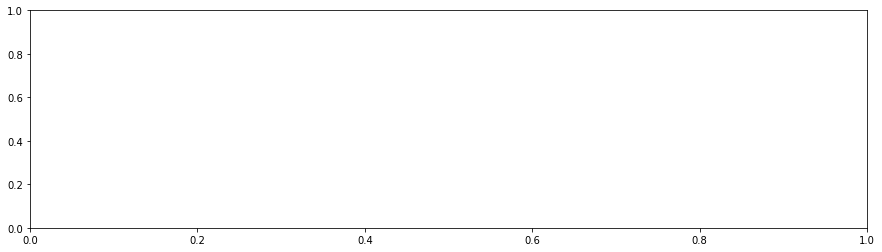

In [26]:
fig, ax = plt.subplots(figsize=(15, 4))
fig.set_facecolor("white")

# Plotting each file's temperature vs. minutes
for i in range(len(minutes)):
    ax.cla()  # clear axis for each individual mouse
    mice_min = minutes[i]  # renaming the minutes to the current column
    mice_temp = temp[i]  # renaming the temperature to the current column
    
    # Series to Data Frame
    mice_temp = mice_temp.to_frame()
    mice_min = mice_min.to_frame()
    
    # Get the column names for the current file
    names = mice_temp.columns[0]
    
    # Plotting the time series
    ax.plot(mice_min, mice_temp, label=names)  # plotting the time series
    ax.grid(True)  # adding a grid
    ax.set_xlim(-500, 25000, 2000)
    ax.set_ylim(30, 42, 0.5)
    ax.set_xlabel("Minutes")  # x label
    ax.set_ylabel('Temperature (°C)')  # y label
    ax.legend()  # name of the mouse
    
    matching_columns = set(df_temp_combined.columns).intersection(Transpose_infection_1.columns)
    
    if matching_columns:
        column_name = matching_columns.pop()
        infection_time = Transpose_infection_1.loc[1, column_name]
        # Add a vertical line at the infection time
        ax.axvline(x=infection_time, color='r', linestyle='--')
    else:
        print(f"No match found for mouse '{names[0]}'")
    
    # Save each plot
    filename = "Infection/%s.png" % names[0]  # saving the file as the name of the mouse
    fig.savefig(filename)


In [24]:
type(mice_temp)

pandas.core.series.Series

## Ignore

In [ ]:
#Before the change

# Read temperature data
folder = "/Users/yoddmena/Downloads/Research/Telemetry_edited/"

files = glob.glob( folder + "Ex *.xlsx" ) 

minutes = []
temp = []

#k = 0
for file in files:
    #k = k +1
    #if k > 1:
        #break
    df = pd.read_excel(file) # reading the excel file
    
    file_min = df.iloc[:,0] #getting only the minutes
    file_temp = df.iloc[:,3::2] # slicing the data for only temperature
   
    # Ensure that the number of minutes matches the number of temperature columns
    num_temp_columns = file_temp.shape[1]
    file_min = file_min[:num_temp_columns]
    
    minutes.append(file_min)  # adding minutes into the list
    temp.append(file_temp)  # adding the file into the list

In [ ]:
# Combining all data frames inside the list temp into one data frame
'''
df_temp_combined = pd.concat(temp, axis=0)
df_temp_combined
'''


#### Plots

In [ ]:
# PLOTTING EACH TIME SERIES
fig, ax = plt.subplots(figsize=(15, 4))
fig.set_facecolor("white")  # Changing the border to white

# Plotting each file's temperature vs. minutes
for i in range(len(minutes)):
    mice_min = minutes[i]  # renaming the minutes to the current column
    mice_temp = temp[i]  # renaming the temperature to the current column
    x_axis = mice_min  # defining the x axis
    
    # A for loop for the temperatures (extracting only the column of data frame)
    for j in range(mice_temp.shape[1]):
        ax.cla()  # clear axis for each individual mouse
        y_axis = mice_temp.iloc[:, j]  # defining the y axis
        names = mice_temp.columns[j]  # extracting the names of the columns (mouse name)
        
        # Rename the column
        renamed_column = names.split()[0]  # Keep only the first word as the new column name
        y_axis.columns = [renamed_column]
        
        # Get the corresponding infection time for the current mouse
        matching_columns = set([renamed_column]).intersection(Transpose_infection_1.columns)
        if len(matching_columns) > 0:
            infection_time = Transpose_infection_1[matching_columns.pop()].iloc[0]
        else:
            print(f"No infection time found for mouse: {renamed_column}")
            continue

        # Plotting the time series
        ax.plot(x_axis, y_axis, label=renamed_column)  # plotting the time series
        ax.grid(True)  # adding a grid
        ax.set_xlim(-500, 25000, 2000)
        ax.set_ylim(30, 42, 0.5)
        ax.set_xlabel("Minutes")  # x label
        ax.set_ylabel('Temperature (°C)')  # y label
        ax.legend()  # name of the mouse
        
        # Add a vertical line for the infection time
        ax.axvline(x=infection_time, color='r', linestyle='--')
        
        # Save each plot
        filename = "Infection/%s.png" % renamed_column  # saving the file as the name of the mouse
        fig.savefig(filename)


In [ ]:
# PLOTTING EACH TIME SERIES
fig, ax = plt.subplots(figsize=(15, 4))
fig.set_facecolor("white")  # Changing the border to white

# Plotting each file's temperature vs. minutes
for i in range(len(minutes)):
    mice_min = minutes[i]  # renaming the minutes to the current column
    mice_temp = temp[i]  # renaming the temperature to the current column
    x_axis = mice_min  # defining the x axis
    
    # A for loop for the temperatures (extracting only the column of data frame)
    for j in range(mice_temp.shape[1]):
        ax.cla()  # clear axis for each individual mouse
        y_axis = mice_temp.iloc[:, j]  # defining the y axis
        names = mice_temp.columns[j]  # extracting the names of the columns (mouse name)
        
        y_axis.columns = y_axis.columns.str.split(' ').str[0]
        
        # Get the corresponding infection time for the current mouse
        infection_time = infection_data.loc[names, 'Infection Time']
        
        # Plotting the time series
        ax.plot(x_axis, y_axis, label=names)  # plotting the time series
        ax.grid(True)  # adding a grid
        ax.set_xlim(-500, 25000, 2000)
        ax.set_ylim(30, 42, 0.5)
        ax.set_xlabel("Minutes")  # x label
        ax.set_ylabel('Temperature (°C)')  # y label
        ax.legend()  # name of the mouse
        
        # Add a vertical line for the infection time
        ax.axvline(x=infection_time, color='r', linestyle='--')
        
        # Save each plot
        filename = "Infection/%s.png" % names  # saving the file as the name of the mouse
        fig.savefig(filename)

In [ ]:
# Assuming you have three DataFrames: df_temp_combined, minutes, and Transpose_infection_1

# Match column names between df_temp_combined and Transpose_infection_1
matching_columns = set(df_temp_combined.columns).intersection(Transpose_infection_1.columns)


fig,ax = plt.subplots(figsize=(15,4))
fig.set_facecolor("white") # Changing the border to white


# Create separate plots for each matching column
for column_name in matching_columns:
    # Create a new plot for each column
    ax.clear()

    # Extract temperature and infection time for the current column
    temperature = df_temp_combined[column_name]
    infection_time = Transpose_infection_1[column_name].iloc[0]  # Assuming infection time is in the first row

    # Create a time series plot
    ax.plot(df_minutes, temperature, label=column_name)

    # Add a vertical line at the infection time
    ax.axvline(x=infection_time, color='r', linestyle='--')

    # Customize the plot
    ax.grid()
    ax.set_xlabel('Minutes')
    ax.set_ylabel('Temperature')
    ax.set_title(f'Temperature Time Series with Infection Time ({column_name})')
    ax.set_xlim(-5,275000) # x limits
    ax.set_ylim(30,42,0.5)
    ax.legend()
    
    #SAVING EACH PLOT
    filename = "Infection/%s.png"%column_name # saving the file as the name of the mouse
    fig.savefig(filename)

